In [ ]:
!jupyter nbconvert fork.ipynb --to slides --post serve

[NbConvertApp] Converting notebook fork.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 487433 bytes to fork.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/fork.slides.html
Use Control-C to stop this server


# Процессы и Потоки

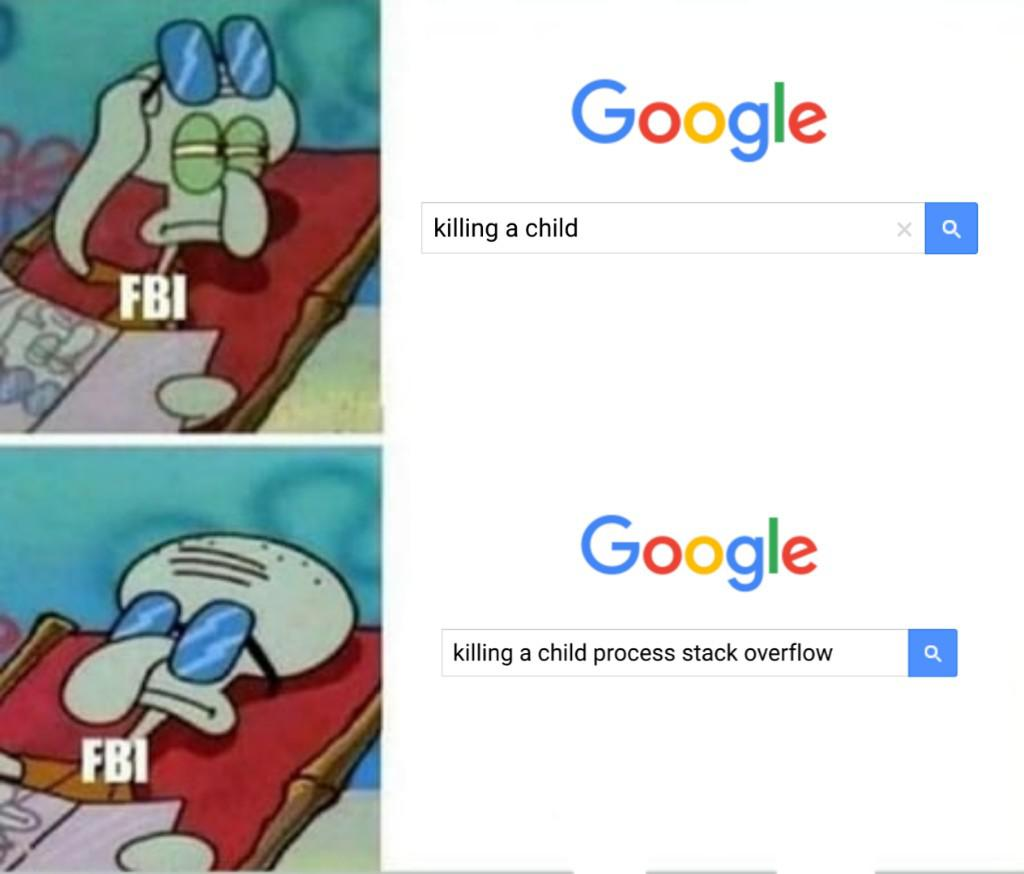

## Можно запустить ps/top/htop

И посмотреть на процессы

```bash
top - 11:02:09 up 1 day, 13:11,  2 users,  load average:
Tasks: 275 total,   1 running, 274 sleeping,   0 stopped,
%Cpu(s):  3.5 us,  0.9 sy,  0.0 ni, 94.8 id,  0.0 wa,  0.
MiB Mem :  15657.6 total,   6400.8 free,   5921.1 used,
MiB Swap:  16384.0 total,  16384.0 free,      0.0 used.

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU
   1293 danila    20   0   20.5g 640544 314656 S  10.3
   1036 danila    20   0 1496588 112980  53876 S   6.0
   1384 danila    20   0 2966060 368732 126540 S   5.3
  14159 danila    20   0   10.5g 264180 200532 S   5.0
  22543 danila    20   0  766612  70448  20760 S   3.3
  10066 danila    25   5   17244   9872   6996 S   3.0
  21412 danila    20   0 3180420 796492 169576 S   3.0
   1411 danila    20   0 2696188 236172 143296 S   1.3
    395 root     -51   0       0      0      0 S   1.0
  12898 danila    20   0 1131.1g 390508 224068 S   1.0
  26254 danila    20   0 1009776 194860 136492 S   1.0
  13215 root       0 -20       0      0      0 D   0.7
```

# А что такое процесс?)

(это вопрос в зал)

# А что такое процесс?)

**Проргамма в состоянии выполнения**

**Единица внимания операционной системы**

# К процессу подвязано много всего

1. Исполняемый код
2. Открытые файловые дескрипторы
3. Сигналы, ожидающие обработки
4. Внутренние данные ядра
5. Состояние процесса
6. Адресное пространство, в которое отображена память или файлы
7. Один или несколько потоков выполнения (*)
8. Прочие сегменты данных

## 1. Исполняемый код

Чтоб что-то исполнять, нам нужно это что-то хранить. (thx cap)

Желательно в оперативной памяти, и с соответствующими правами на чтение + исполнение.

Это ‘что-то’ - это машинные инструкции (aka op-коды).

Секция - `.text`

## 2. Открытые файловые дескрипторы

Файловый дескриптор - абстракция внутри операционной системы.

Следить за ресурсами, которые за ними скрываются, - задача операционной системы

## 3. Сигналы, ожидающие обработки

Процессы могут общаться друг с другом (и с ядром), посылая друг другу сигналы. 

Сигналы идейно похожи на _syscall наоборот_ - мы описываем, какие сигналы может обрабатывать ядро.

Потом, в после получения сигнала, будет вызвана его функция-обработчи

(подробнее на лекции)

(а это - семинар)

## 4. Внутренние данные ядра

[ссылка на `task_struct`](https://github.com/torvalds/linux/blob/master/include/linux/sched.h#L778)

## 5. Состояние процесса

Вы уже вроде поделали домашки по ассемблеру (я надеюсь)

Вы заметили, как сложно было писать код?

Вам нужно было постоянно думать о других процессах?

Нет))))

Потому что ядро справляется прятоть весь остальной мир от вашей программы)

## 6. Адресное пространство, в которое отображена память или файлы

(Можно отнести к внутренним данным ядра, но давайте отдельно выделим)

mmap - интрефейс ядра

То, что мы навыделяли / наотображали нужно где-то хранить)

## 7. Один или несколько потоков выполнения (*)

Про несколько потоков выполнения - наглая ложь (об этом потом)

Но состояние нашего одного единственного потока надо где-то хранить))

Состояние запущенной программы = стек + регистры

Есть `*stack` с `PUSH_REGS` и `POP_REGS`, а так же костыли с `__state`

## 8. Прочие сегменты данных

- `.text`

- `.data`

- `.rodata`

- `.bss`

ну и т.д.

Сегменты “закреплены” за процессом.

# Пример с procfs

# Этапы жизни процесса

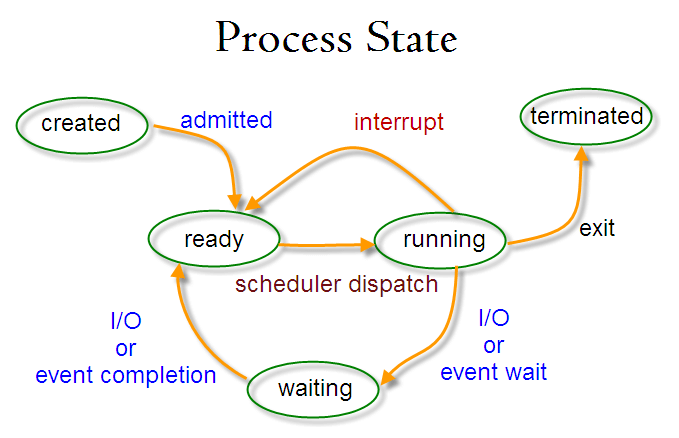

- **R (running)** - процесс в состоянии выполнения
- **S (sleeping)** - процесс свободен, ждет наступления какого-либо события (спит), может обрабатывать поступающие сигналы
- **D (disk sleep)** - процесс занят (Uninterruptable sleep) тем, что ждет наступления события) не обрабатывает поступающие сигналы
- **T (stopped)** - процесс остановлен (например через SIGSTOP)
- **t (tracing stop)** - кто-то через ptrace управляет нашим процессом
- **X (dead)** - процесс мертв) такое состояние вы, скорее, всего не увидите (живет мало)
- **Z (zombie)** процесс мертв и ожидает, когда родительский процесс получит код возврата

## А как же потоки?

# В Linux потоков не существует
> данная формулировка может не совпадать с формулировкой, озвученной на лекции

## Много холиваров на тему

# ПРОЦЕССОВ НЕ СУЩЕСТВУЕТ

# ПОТОКОВ НЕ СУЩЕСТВУЕТ

# ПРОЦЕСС = ПОТОК

# В LINUX ЕСТЬ ПОТОКИ!

## А если серьезно - то

В Linux есть способ разделять ресурсы (память)

и это никак не завязано на "потоки"

Создание "процесса" и "потока" в Linux отличаются только глубиной копирований `task_struct`

Есть `fork` - он создает процесс

Есть `clone` (запоминать не нужно) - он создает процесс, но более гибко

(типа "поток")

```с
int clone(
    int (*fn)(void *_Nullable),
    void *stack,
    int flags,
    void *_Nullable arg,
    ... 
    /* pid_t *_Nullable parent_tid,
       void *_Nullable tls,
       pid_t *_Nullable child_tid
    */
);
```

Но под капотом они вызывают одно и то же!

- [вот тут объявлен fork](https://github.com/torvalds/linux/blob/master/kernel/fork.c#L2866)

- [вот тут объявлен clone](https://github.com/torvalds/linux/blob/master/kernel/fork.c#L2895)

- [вот это они вызывают под капотом](https://github.com/torvalds/linux/blob/master/kernel/fork.c#L2743)

А ещё в Linux есть возможность определять процессы в группы

номер группы = номер первого процесса в ней

Разграничение **поток** / **процесс** - выдумано программистами для программистов

Чтоб как-то разграничивать "способ работы" с ними

(один создается для одного - второй для другого)

**На уровне ядра разницы нет** (и то и другое - таска)

# Примеры fork + exec

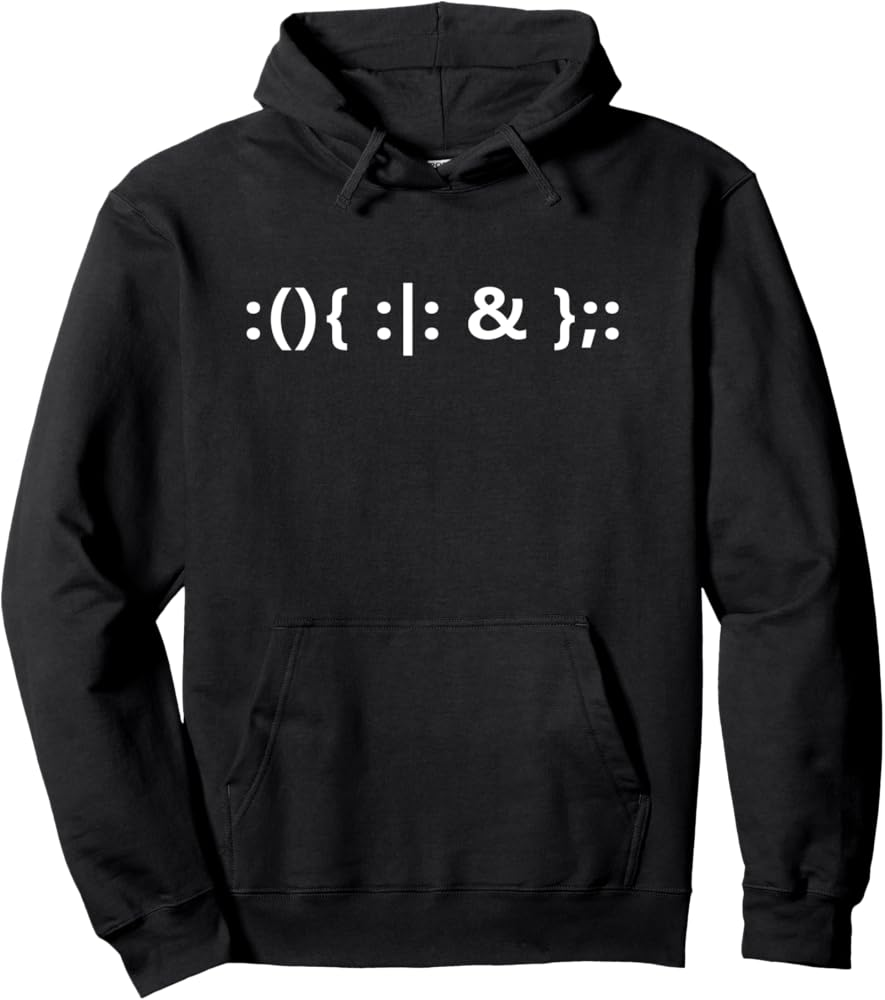

# Примеры pthread_create

# Про защиту!)

Создайте из (initial)-коммита ветку `review` и сделайте mr из `main` в `review`

(ближе к вечеру будет инструкция)

Ссылка, чтоб объяснить зачем: [sun_of_monaco/review](https://gitlab.carzil.ru/mipt-os-basic-2024-autumn/sun_of_monaco/-/merge_requests/1/diffs)

# Σας ευχαριστώ!